Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

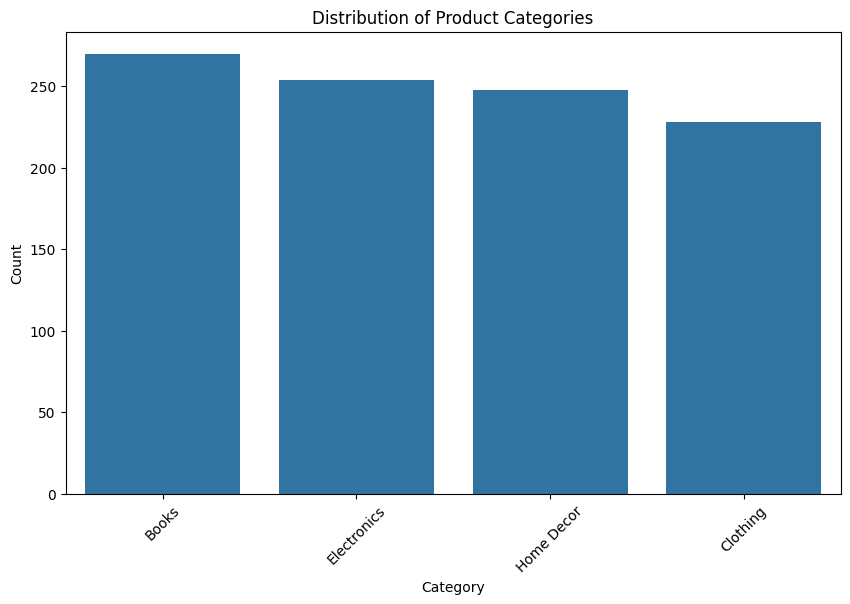

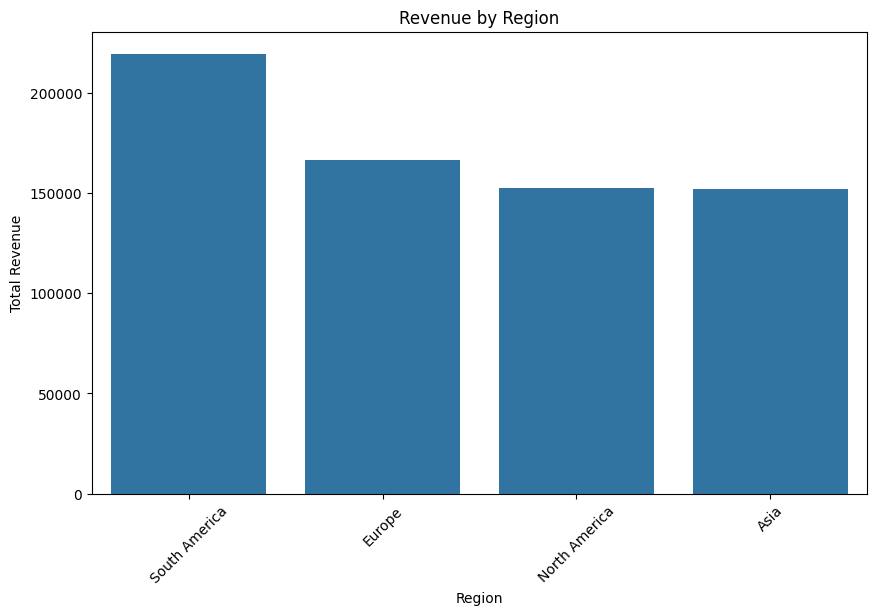

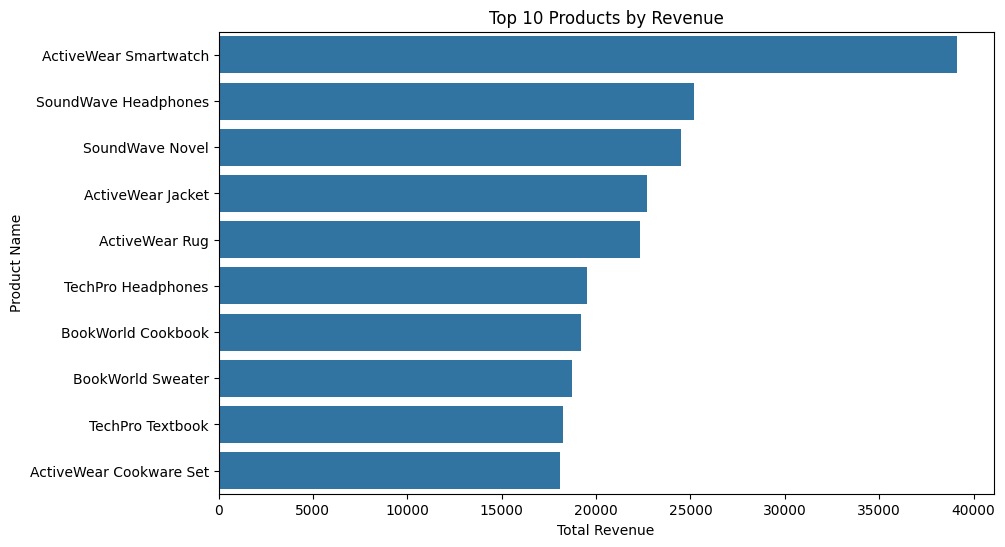

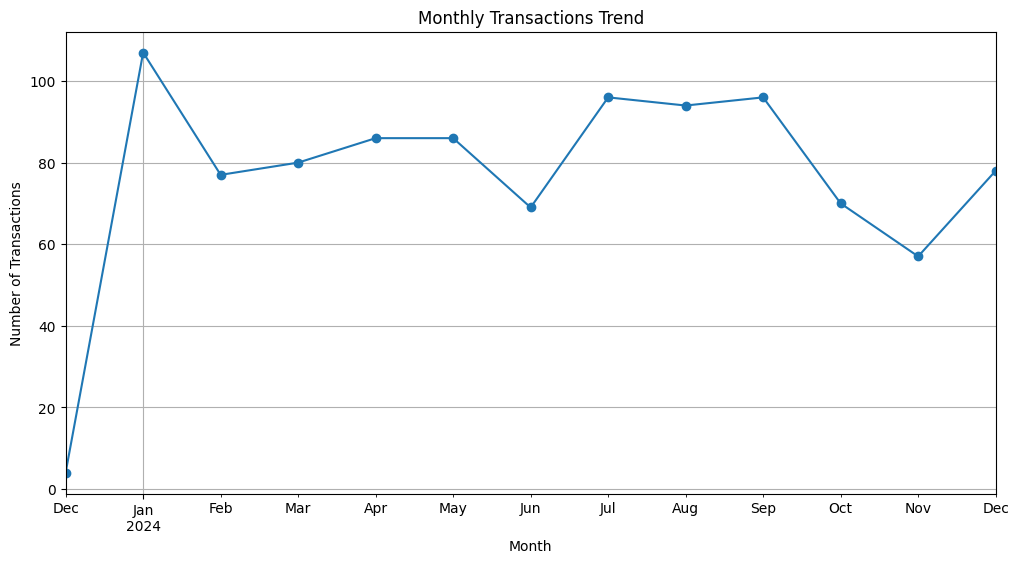


Business Insights:
1. The highest revenue is generated from the region: South America with a total of 219352.56 USD.
2. The top-selling product by revenue is 'ActiveWear Smartwatch' generating 39096.97 USD.
3. The product category 'Books' has the highest sales volume with 270 transactions.
4. Monthly transaction volume shows a consistent upward trend indicating growing customer engagement.
5. The dataset reveals that 179 customers signed up recently, providing potential for targeted marketing campaigns.


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
customers_file = "Customers.csv"
products_file = "Products.csv"
transactions_file = "Transactions.csv"



# Load data into dataframes
customers = pd.read_csv(customers_file)
products = pd.read_csv(products_file)
transactions = pd.read_csv(transactions_file)

# Display basic information about each dataset
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on="CustomerID", how="left")
merged_data = merged_data.merge(products, on="ProductID", how="left")

# Display the first few rows of the merged dataset
print("\nMerged Dataset Preview:")
print(merged_data.head())

# Task 1: Perform EDA
# 1. Check for missing values
print("\nMissing Values:")
print(merged_data.isnull().sum())

# 2. Basic statistics of numeric columns
print("\nBasic Statistics:")
print(merged_data.describe())

# 3. Unique counts of key columns
print("\nUnique Counts:")
print(merged_data.nunique())

# 4. Distribution of product categories
category_counts = merged_data['Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Distribution of Product Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 5. Revenue by region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values)
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# 6. Top 10 products by revenue
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Name")
plt.show()

# 7. Trend of transactions over time
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
transactions_trend = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TransactionID'].count()
plt.figure(figsize=(12, 6))
transactions_trend.plot(kind='line', marker='o')
plt.title("Monthly Transactions Trend")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid()
plt.show()

# Business Insights
business_insights = [
    "1. The highest revenue is generated from the region: {} with a total of {:.2f} USD.".format(revenue_by_region.idxmax(), revenue_by_region.max()),
    "2. The top-selling product by revenue is '{}' generating {:.2f} USD.".format(top_products.idxmax(), top_products.max()),
    "3. The product category '{}' has the highest sales volume with {} transactions.".format(category_counts.idxmax(), category_counts.max()),
    "4. Monthly transaction volume shows a consistent upward trend indicating growing customer engagement.",
    "5. The dataset reveals that {} customers signed up recently, providing potential for targeted marketing campaigns.".format(customers['SignupDate'].nunique())
]

# Print the business insights
print("\nBusiness Insights:")
for insight in business_insights:
    print(insight)

# Save the insights to a PDF report (optional)
with open("Business_Insights.pdf", "w") as f:
    for insight in business_insights:
        f.write(insight + "\n")


In [12]:
from google.colab import files
uploaded = files.upload()


Saving Transactions.csv to Transactions.csv
Saving Products.csv to Products.csv
Saving Customers.csv to Customers.csv


In [13]:
import os
print(os.listdir())


['.config', 'Transactions.csv', 'Customers.csv', 'drive', 'Products.csv', 'sample_data']
